In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow 
import numpy as np
from matplotlib import style
from numpy.random import seed

In [2]:
import nltk

# Read CSV file

In [3]:
data = pd.read_csv("mtsamples 4.csv" ,index_col=[0])
data

,description,medical_specialty,sample_name,transcription,keywords
0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."
...,...,...,...,...,...
4994,Patient having severe sinusitis about two to ...,Allergy / Immunology,Chronic Sinusitis,"HISTORY:, I had the pleasure of meeting and e...",NaN
4995,This is a 14-month-old baby boy Caucasian who...,Allergy / Immunology,Kawasaki Disease - Discharge Summary,"ADMITTING DIAGNOSIS: , Kawasaki disease.,DISCH...","allergy / immunology, mucous membranes, conjun..."
4996,A female for a complete physical and follow u...,Allergy / Immunology,Followup on Asthma,"SUBJECTIVE: , This is a 42-year-old white fema...",NaN
4997,Mother states he has been wheezing and coughing.,Allergy / Immunology,Asthma in a 5-year-old,"CHIEF COMPLAINT: , This 5-year-old male presen...",NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4999 entries, 0 to 4998
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   description        4999 non-null   object
 1   medical_specialty  4999 non-null   object
 2   sample_name        4999 non-null   object
 3   transcription      4966 non-null   object
 4   keywords           3931 non-null   object
dtypes: object(5)
memory usage: 234.3+ KB


In [5]:
del data['keywords']

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4999 entries, 0 to 4998
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   description        4999 non-null   object
 1   medical_specialty  4999 non-null   object
 2   sample_name        4999 non-null   object
 3   transcription      4966 non-null   object
dtypes: object(4)
memory usage: 195.3+ KB


In [7]:
data.isnull().sum()

description           0
medical_specialty     0
sample_name           0
transcription        33
dtype: int64

In [8]:
data = data.dropna(axis=0, how = 'any')
data.sample(5)

,description,medical_specialty,sample_name,transcription
4175,"Adenocarcinoma of the prostate, Erectile dysf...",Consult - History and Phy.,Prostate Adenocarcinoma - H&P,"HISTORY OF PRESENT ILLNESS: , The patient is a..."
2759,"EEG during wakefulness, drowsiness, and sleep...",Neurology,Video EEG - 2,"IMPRESSION: ,EEG during wakefulness, drowsine..."
1784,Psychiatric Consultation of patient with alte...,Psychiatry / Psychology,Psych Consult - Altered Mental Status,"REASON FOR CONSULT:, Altered mental status.,H..."
1074,Right carpal tunnel release. Right carpal tu...,Surgery,Carpal Tunnel Release - 9,"PREOPERATIVE DIAGNOSIS:, Right carpal tunnel ..."
2297,"Bunion, left foot. Bunionectomy with first m...",Orthopedic,Bunionectomy & Akin Osteotomy,"PREOPERATIVE DIAGNOSIS: , Bunion, left foot.,P..."


In [9]:
data.isnull().sum()

description          0
medical_specialty    0
sample_name          0
transcription        0
dtype: int64

In [10]:
data['transcription'] = data['transcription'].astype('str')
data['transcription']

C:\Users\Thirumalai\AppData\Local\Temp\ipykernel_7636\3041967364.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['transcription'] = data['transcription'].astype('str')


0       SUBJECTIVE:,  This 23-year-old white female pr...
1       PAST MEDICAL HISTORY:, He has difficulty climb...
2       HISTORY OF PRESENT ILLNESS: , I have seen ABC ...
3       2-D M-MODE: , ,1.  Left atrial enlargement wit...
4       1.  The left ventricular cavity size and wall ...
                              ...                        
4994    HISTORY:,  I had the pleasure of meeting and e...
4995    ADMITTING DIAGNOSIS: , Kawasaki disease.,DISCH...
4996    SUBJECTIVE: , This is a 42-year-old white fema...
4997    CHIEF COMPLAINT: , This 5-year-old male presen...
4998    HISTORY: , A 34-year-old male presents today s...
Name: transcription, Length: 4966, dtype: object

In [11]:
data['transcription'] = data['transcription'].str.lower()
data['transcription']

C:\Users\Thirumalai\AppData\Local\Temp\ipykernel_7636\2043168528.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['transcription'] = data['transcription'].str.lower()


0       subjective:,  this 23-year-old white female pr...
1       past medical history:, he has difficulty climb...
2       history of present illness: , i have seen abc ...
3       2-d m-mode: , ,1.  left atrial enlargement wit...
4       1.  the left ventricular cavity size and wall ...
                              ...                        
4994    history:,  i had the pleasure of meeting and e...
4995    admitting diagnosis: , kawasaki disease.,disch...
4996    subjective: , this is a 42-year-old white fema...
4997    chief complaint: , this 5-year-old male presen...
4998    history: , a 34-year-old male presents today s...
Name: transcription, Length: 4966, dtype: object

In [12]:
chars = ['#',':,',': ,',';','$','!','?','*','``','1. ', '2. ', '3. ', '4. ', '5. ','6. ','7. ','8. ','9. ','10. ']
for c in chars:
    data['transcription']=data['transcription'] = data['transcription'].str.replace(c,"")

data.sample(5)

C:\Users\Thirumalai\AppData\Local\Temp\ipykernel_7636\2068875840.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['transcription']=data['transcription'] = data['transcription'].str.replace(c,"")
C:\Users\Thirumalai\AppData\Local\Temp\ipykernel_7636\2068875840.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['transcription']=data['transcription'] = data['transcription'].str.replace(c,"")
C:\Users\Thirumalai\AppData\Local\Temp\ipykernel_7636\2068875840.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data['transcription']=dat

,description,medical_specialty,sample_name,transcription
4843,Shortness of breath for two weeks and a histo...,Cardiovascular / Pulmonary,CT Angiography - 1,"ct angiography chest with contrast,reason for ..."
1716,CT of the abdomen and pelvis without contrast.,Radiology,CT Abdomen & Pelvis - 3,exam ct of the abdomen and pelvis without cont...
1935,"The patient is 14 months old, comes in with a...",Pediatrics - Neonatal,Difficulty Breathing - ER Visit,"history the patient is months old, comes in w..."
1662,CT of abdomen with and without contrast. CT-...,Radiology,CT-Guided Needle Placement Biopsy,exam ct of abdomen with and without contrast. ...
960,"Occipital craniotomy, removal of large tumor ...",Surgery,Craniotomy - Occipital,"preoperative diagnosis brain tumors, multiple...."


# Tokenizing

In [13]:
from nltk.tokenize import sent_tokenize, word_tokenize

data['tokenized_sents'] = data['transcription'].apply(nltk.word_tokenize)
data.sample(5)

C:\Users\Thirumalai\AppData\Local\Temp\ipykernel_7636\2951544351.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tokenized_sents'] = data['transcription'].apply(nltk.word_tokenize)


,description,medical_specialty,sample_name,transcription,tokenized_sents
4774,"Left heart catheterization, left ventriculogr...",Cardiovascular / Pulmonary,"Heart Catheterization, Ventriculography, & An...","procedure left heart catheterization, left ve...","[procedure, left, heart, catheterization, ,, l..."
2540,Repeat cesarean section and bilateral tubal l...,Obstetrics / Gynecology,Repeat C-section,preoperative diagnoses intrauterine pregnancy ...,"[preoperative, diagnoses, intrauterine, pregna..."
1451,Aplastic anemia. After several bone marrow b...,SOAP / Chart / Progress Notes,Aplastic Anemia Followup,"chief complaint aplastic anemia.,history of pr...","[chief, complaint, aplastic, anemia., ,, histo..."
4588,Patient had a markedly abnormal stress test w...,Consult - History and Phy.,Abnormal Stress Test,history of present illness mr. abc is a 60-yea...,"[history, of, present, illness, mr., abc, is, ..."
3404,A white female with a history of fevers.,General Medicine,Discharge Summary - 8,discharge diagnoses gram-negative rod bacterem...,"[discharge, diagnoses, gram-negative, rod, bac..."


In [14]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Thirumalai\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['post_stopwords'] = data['tokenized_sents'].apply(lambda x: [item for item in x if item not in stop])
data.sample(5)

C:\Users\Thirumalai\AppData\Local\Temp\ipykernel_7636\3524766332.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['post_stopwords'] = data['tokenized_sents'].apply(lambda x: [item for item in x if item not in stop])


,description,medical_specialty,sample_name,transcription,tokenized_sents,post_stopwords
1544,Whole body PET scanning.,Radiology,PET Report - Whole Body Scan,"indication lung carcinoma.,whole body pet scan...","[indication, lung, carcinoma., ,, whole, body,...","[indication, lung, carcinoma., ,, whole, body,..."
4126,Well-child check and school physical.,Consult - History and Phy.,School Physical - 2,chief complaint well-child check and school p...,"[chief, complaint, well-child, check, and, sch...","[chief, complaint, well-child, check, school, ..."
2925,Noncontrast CT head due to seizure disorder.,Neurology,CT Head - 1,"exam ct head.,reason for exam seizure disord...","[exam, ct, head., ,, reason, for, exam, seizur...","[exam, ct, head., ,, reason, exam, seizure, di..."
4671,Repair of total anomalous pulmonary venous co...,Cardiovascular / Pulmonary,Septal Defect Repair,title of operation repair of total anomalous p...,"[title, of, operation, repair, of, total, anom...","[title, operation, repair, total, anomalous, p..."
264,Total abdominal hysterectomy. Enlarged fibro...,Surgery,Total Abdominal Hysterectomy - 2,preoperative diagnoses enlarged fibroid uterus...,"[preoperative, diagnoses, enlarged, fibroid, u...","[preoperative, diagnoses, enlarged, fibroid, u..."


In [16]:
data['tokenized_sents']=data['tokenized_sents'].astype('str')
data['tokenized_sents']

C:\Users\Thirumalai\AppData\Local\Temp\ipykernel_7636\4211167936.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tokenized_sents']=data['tokenized_sents'].astype('str')


0       ['subjective', 'this', '23-year-old', 'white',...
1       ['past', 'medical', 'history', 'he', 'has', 'd...
2       ['history', 'of', 'present', 'illness', 'i', '...
3       ['2-d', 'm-mode', ',', 'left', 'atrial', 'enla...
4       ['the', 'left', 'ventricular', 'cavity', 'size...
                              ...                        
4994    ['history', 'i', 'had', 'the', 'pleasure', 'of...
4995    ['admitting', 'diagnosis', 'kawasaki', 'diseas...
4996    ['subjective', 'this', 'is', 'a', '42-year-old...
4997    ['chief', 'complaint', 'this', '5-year-old', '...
4998    ['history', 'a', '34-year-old', 'male', 'prese...
Name: tokenized_sents, Length: 4966, dtype: object

In [17]:
data['tokens'] = data['tokenized_sents'].str.split().str.len()
data.sample(5)

C:\Users\Thirumalai\AppData\Local\Temp\ipykernel_7636\1907024508.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tokens'] = data['tokenized_sents'].str.split().str.len()


,description,medical_specialty,sample_name,transcription,tokenized_sents,post_stopwords,tokens
1691,Motor vehicle collision. CT head without con...,Radiology,CT Head and C Spine,ct head without contrast and ct cervical spine...,"['ct', 'head', 'without', 'contrast', 'and', '...","[ct, head, without, contrast, ct, cervical, sp...",223
4000,Dietary consultation for carbohydrate countin...,Diets and Nutritions,Carbohydrate Counting,subjective this is a 62-year-old female who c...,"['subjective', 'this', 'is', 'a', '62-year-old...","[subjective, 62-year-old, female, comes, dieta...",516
4845,Coronary Artery CTA with Calcium Scoring and ...,Cardiovascular / Pulmonary,Coronary CT Angiography (CCTA) - 3,exam coronary artery cta with calcium scoring ...,"['exam', 'coronary', 'artery', 'cta', 'with', ...","[exam, coronary, artery, cta, calcium, scoring...",188
2491,Nephrology office visit for followup of micro...,Office Notes,Nephrology Office Visit - 1,"history of present illness: ,the patient is a...","['history', 'of', 'present', 'illness', ':', '...","[history, present, illness, :, ,, patient, 78-...",529
319,Right suboccipital craniectomy for resection ...,Surgery,Suboccipital Craniectomy,title of operation right suboccipital craniect...,"['title', 'of', 'operation', 'right', 'subocci...","[title, operation, right, suboccipital, cranie...",998


In [18]:
data['medical_specialty'].unique()

array([' Allergy / Immunology', ' Bariatrics',
       ' Cardiovascular / Pulmonary', ' Neurology', ' Dentistry',
       ' Urology', ' General Medicine', ' Surgery', ' Speech - Language',
       ' SOAP / Chart / Progress Notes', ' Sleep Medicine',
       ' Rheumatology', ' Radiology', ' Psychiatry / Psychology',
       ' Podiatry', ' Physical Medicine - Rehab',
       ' Pediatrics - Neonatal', ' Pain Management', ' Orthopedic',
       ' Ophthalmology', ' Office Notes', ' Obstetrics / Gynecology',
       ' Neurosurgery', ' Nephrology', ' Letters',
       ' Lab Medicine - Pathology', ' IME-QME-Work Comp etc.',
       ' Hospice - Palliative Care', ' Hematology - Oncology',
       ' Gastroenterology', ' ENT - Otolaryngology', ' Endocrinology',
       ' Emergency Room Reports', ' Discharge Summary',
       ' Diets and Nutritions', ' Dermatology',
       ' Cosmetic / Plastic Surgery', ' Consult - History and Phy.',
       ' Chiropractic', ' Autopsy'], dtype=object)

In [19]:
data['medical_specialty'].value_counts()


 Surgery                          1088
 Consult - History and Phy.        516
 Cardiovascular / Pulmonary        371
 Orthopedic                        355
 Radiology                         273
 General Medicine                  259
 Gastroenterology                  224
 Neurology                         223
 SOAP / Chart / Progress Notes     166
 Urology                           156
 Obstetrics / Gynecology           155
 Discharge Summary                 108
 ENT - Otolaryngology               96
 Neurosurgery                       94
 Hematology - Oncology              90
 Ophthalmology                      83
 Nephrology                         81
 Emergency Room Reports             75
 Pediatrics - Neonatal              70
 Pain Management                    61
 Psychiatry / Psychology            53
 Office Notes                       50
 Podiatry                           47
 Dermatology                        29
 Cosmetic / Plastic Surgery         27
 Dentistry               

In [20]:
data['medical_specialty'].nunique()

40

In [21]:
data = data[(data['medical_specialty'] != ' Discharge Summary')& 
            (data['medical_specialty'] != ' Office Notes') & 
            (data['medical_specialty'] != ' SOAP / Chart / Progress Notes') &
            (data['medical_specialty'] != ' Letters') &
            (data['medical_specialty'] != ' IME-QME-Work Comp etc.') &
           (data['medical_specialty'] != ' Hospice - Palliative Care')&
           (data['medical_specialty'] != ' Emergency Room Reports') &
            (data['medical_specialty'] != ' Autopsy')]
data

,description,medical_specialty,sample_name,transcription,tokenized_sents,post_stopwords,tokens
0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,subjective this 23-year-old white female pres...,"['subjective', 'this', '23-year-old', 'white',...","[subjective, 23-year-old, white, female, prese...",239
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,past medical history he has difficulty climbin...,"['past', 'medical', 'history', 'he', 'has', 'd...","[past, medical, history, difficulty, climbing,...",439
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,history of present illness i have seen abc tod...,"['history', 'of', 'present', 'illness', 'i', '...","[history, present, illness, seen, abc, today, ...",860
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-d m-mode , left atrial enlargement with left...","['2-d', 'm-mode', ',', 'left', 'atrial', 'enla...","[2-d, m-mode, ,, left, atrial, enlargement, le...",80
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,the left ventricular cavity size and wall thi...,"['the', 'left', 'ventricular', 'cavity', 'size...","[left, ventricular, cavity, size, wall, thickn...",243
...,...,...,...,...,...,...,...
4994,Patient having severe sinusitis about two to ...,Allergy / Immunology,Chronic Sinusitis,history i had the pleasure of meeting and eva...,"['history', 'i', 'had', 'the', 'pleasure', 'of...","[history, pleasure, meeting, evaluating, patie...",913
4995,This is a 14-month-old baby boy Caucasian who...,Allergy / Immunology,Kawasaki Disease - Discharge Summary,"admitting diagnosis kawasaki disease.,discharg...","['admitting', 'diagnosis', 'kawasaki', 'diseas...","[admitting, diagnosis, kawasaki, disease., ,, ...",301
4996,A female for a complete physical and follow u...,Allergy / Immunology,Followup on Asthma,subjective this is a 42-year-old white female ...,"['subjective', 'this', 'is', 'a', '42-year-old...","[subjective, 42-year-old, white, female, comes...",830
4997,Mother states he has been wheezing and coughing.,Allergy / Immunology,Asthma in a 5-year-old,chief complaint this 5-year-old male presents ...,"['chief', 'complaint', 'this', '5-year-old', '...","[chief, complaint, 5-year-old, male, presents,...",487


In [22]:
print(data['tokens'].mean())
print(data['tokens'].median())

532.0682321665928
466.0


In [23]:
data['tokens'].value_counts().sample(50)

127      8
535      8
166      8
356      3
754      2
1272     2
393      5
538      2
1907     2
509      6
128      7
422      7
602      4
361      3
387      3
800      4
847      5
1030     6
1        5
1092     2
366      3
122      4
441      5
904      2
458     11
738      2
506     13
1159     6
643      6
1507     2
743      3
636      4
265      2
96       3
292      7
362     14
586      3
747     12
364      7
1095     4
314      5
1242     1
683      6
528      3
1088     2
354     16
533      2
638      2
568      2
267      7
Name: tokens, dtype: int64

In [24]:
data['medical_specialty'].value_counts()

 Surgery                       1088
 Consult - History and Phy.     516
 Cardiovascular / Pulmonary     371
 Orthopedic                     355
 Radiology                      273
 General Medicine               259
 Gastroenterology               224
 Neurology                      223
 Urology                        156
 Obstetrics / Gynecology        155
 ENT - Otolaryngology            96
 Neurosurgery                    94
 Hematology - Oncology           90
 Ophthalmology                   83
 Nephrology                      81
 Pediatrics - Neonatal           70
 Pain Management                 61
 Psychiatry / Psychology         53
 Podiatry                        47
 Dermatology                     29
 Cosmetic / Plastic Surgery      27
 Dentistry                       27
 Physical Medicine - Rehab       21
 Sleep Medicine                  20
 Endocrinology                   19
 Bariatrics                      18
 Chiropractic                    14
 Diets and Nutritions       

In [25]:
data.groupby('medical_specialty')['tokens'].agg(['count', 'mean', 'median']).sort_values(by='count',ascending = False)

,count,mean,median
medical_specialty,,,
Surgery,1088,539.303309,467.5
Consult - History and Phy.,516,654.213178,581.5
Cardiovascular / Pulmonary,371,492.738544,430.0
Orthopedic,355,626.357746,564.0
Radiology,273,317.948718,264.0
General Medicine,259,550.621622,501.0
Gastroenterology,224,408.906250,346.0
Neurology,223,573.479821,491.0
Urology,156,459.782051,398.0


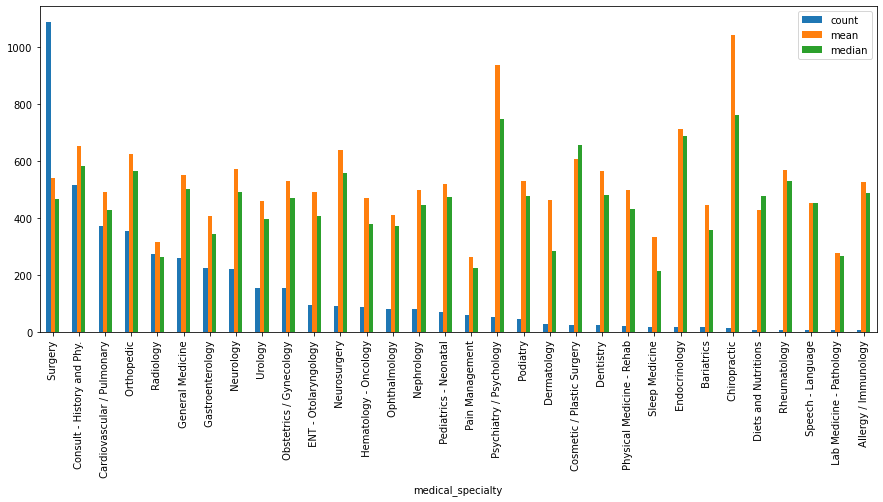

In [27]:
data.groupby('medical_specialty')['tokens'].agg(['count', 'mean', 'median']).sort_values(by='count',ascending = False).plot(kind='bar', figsize=(15,6))
plt.ylabel = ("Token Number")
plt.xlabel = ("Medical Spaecialty")
plt.xticks(rotation = 90)
plt.legend(fancybox= True)
plt.savefig('plots/Corpus_view_with_tokens_number_WITHOUTREDUCTION_Beginning.png')


In [28]:
data = data.replace({' Sleep Medicine': " Sleep and Pain", ' Pain Management': " Sleep and Pain"})
data

,description,medical_specialty,sample_name,transcription,tokenized_sents,post_stopwords,tokens
0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,subjective this 23-year-old white female pres...,"['subjective', 'this', '23-year-old', 'white',...","[subjective, 23-year-old, white, female, prese...",239
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,past medical history he has difficulty climbin...,"['past', 'medical', 'history', 'he', 'has', 'd...","[past, medical, history, difficulty, climbing,...",439
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,history of present illness i have seen abc tod...,"['history', 'of', 'present', 'illness', 'i', '...","[history, present, illness, seen, abc, today, ...",860
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-d m-mode , left atrial enlargement with left...","['2-d', 'm-mode', ',', 'left', 'atrial', 'enla...","[2-d, m-mode, ,, left, atrial, enlargement, le...",80
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,the left ventricular cavity size and wall thi...,"['the', 'left', 'ventricular', 'cavity', 'size...","[left, ventricular, cavity, size, wall, thickn...",243
...,...,...,...,...,...,...,...
4994,Patient having severe sinusitis about two to ...,Allergy / Immunology,Chronic Sinusitis,history i had the pleasure of meeting and eva...,"['history', 'i', 'had', 'the', 'pleasure', 'of...","[history, pleasure, meeting, evaluating, patie...",913
4995,This is a 14-month-old baby boy Caucasian who...,Allergy / Immunology,Kawasaki Disease - Discharge Summary,"admitting diagnosis kawasaki disease.,discharg...","['admitting', 'diagnosis', 'kawasaki', 'diseas...","[admitting, diagnosis, kawasaki, disease., ,, ...",301
4996,A female for a complete physical and follow u...,Allergy / Immunology,Followup on Asthma,subjective this is a 42-year-old white female ...,"['subjective', 'this', 'is', 'a', '42-year-old...","[subjective, 42-year-old, white, female, comes...",830
4997,Mother states he has been wheezing and coughing.,Allergy / Immunology,Asthma in a 5-year-old,chief complaint this 5-year-old male presents ...,"['chief', 'complaint', 'this', '5-year-old', '...","[chief, complaint, 5-year-old, male, presents,...",487


In [29]:
data['medical_specialty'].unique()

array([' Allergy / Immunology', ' Bariatrics',
       ' Cardiovascular / Pulmonary', ' Neurology', ' Dentistry',
       ' Urology', ' General Medicine', ' Surgery', ' Speech - Language',
       ' Sleep and Pain', ' Rheumatology', ' Radiology',
       ' Psychiatry / Psychology', ' Podiatry',
       ' Physical Medicine - Rehab', ' Pediatrics - Neonatal',
       ' Orthopedic', ' Ophthalmology', ' Obstetrics / Gynecology',
       ' Neurosurgery', ' Nephrology', ' Lab Medicine - Pathology',
       ' Hematology - Oncology', ' Gastroenterology',
       ' ENT - Otolaryngology', ' Endocrinology', ' Diets and Nutritions',
       ' Dermatology', ' Cosmetic / Plastic Surgery',
       ' Consult - History and Phy.', ' Chiropractic'], dtype=object)

In [30]:
data['medical_specialty'].value_counts()

 Surgery                       1088
 Consult - History and Phy.     516
 Cardiovascular / Pulmonary     371
 Orthopedic                     355
 Radiology                      273
 General Medicine               259
 Gastroenterology               224
 Neurology                      223
 Urology                        156
 Obstetrics / Gynecology        155
 ENT - Otolaryngology            96
 Neurosurgery                    94
 Hematology - Oncology           90
 Ophthalmology                   83
 Sleep and Pain                  81
 Nephrology                      81
 Pediatrics - Neonatal           70
 Psychiatry / Psychology         53
 Podiatry                        47
 Dermatology                     29
 Cosmetic / Plastic Surgery      27
 Dentistry                       27
 Physical Medicine - Rehab       21
 Endocrinology                   19
 Bariatrics                      18
 Chiropractic                    14
 Diets and Nutritions            10
 Rheumatology               

In [31]:
data['medical_specialty'].unique()

array([' Allergy / Immunology', ' Bariatrics',
       ' Cardiovascular / Pulmonary', ' Neurology', ' Dentistry',
       ' Urology', ' General Medicine', ' Surgery', ' Speech - Language',
       ' Sleep and Pain', ' Rheumatology', ' Radiology',
       ' Psychiatry / Psychology', ' Podiatry',
       ' Physical Medicine - Rehab', ' Pediatrics - Neonatal',
       ' Orthopedic', ' Ophthalmology', ' Obstetrics / Gynecology',
       ' Neurosurgery', ' Nephrology', ' Lab Medicine - Pathology',
       ' Hematology - Oncology', ' Gastroenterology',
       ' ENT - Otolaryngology', ' Endocrinology', ' Diets and Nutritions',
       ' Dermatology', ' Cosmetic / Plastic Surgery',
       ' Consult - History and Phy.', ' Chiropractic'], dtype=object)

In [32]:
data = data.replace({' Cosmetic / Plastic Surgery': " SKIN cosmetics", ' Dermatology': " SKIN cosmetics"})
data['medical_specialty'].value_counts()

 Surgery                       1088
 Consult - History and Phy.     516
 Cardiovascular / Pulmonary     371
 Orthopedic                     355
 Radiology                      273
 General Medicine               259
 Gastroenterology               224
 Neurology                      223
 Urology                        156
 Obstetrics / Gynecology        155
 ENT - Otolaryngology            96
 Neurosurgery                    94
 Hematology - Oncology           90
 Ophthalmology                   83
 Sleep and Pain                  81
 Nephrology                      81
 Pediatrics - Neonatal           70
 SKIN cosmetics                  56
 Psychiatry / Psychology         53
 Podiatry                        47
 Dentistry                       27
 Physical Medicine - Rehab       21
 Endocrinology                   19
 Bariatrics                      18
 Chiropractic                    14
 Diets and Nutritions            10
 Rheumatology                    10
 Speech - Language          

In [33]:
data = data.replace({' Chiropractic': " Physical Therapy", ' Physical Medicine - Rehab': " Physical Therapy"})
data['medical_specialty'].value_counts()

 Surgery                       1088
 Consult - History and Phy.     516
 Cardiovascular / Pulmonary     371
 Orthopedic                     355
 Radiology                      273
 General Medicine               259
 Gastroenterology               224
 Neurology                      223
 Urology                        156
 Obstetrics / Gynecology        155
 ENT - Otolaryngology            96
 Neurosurgery                    94
 Hematology - Oncology           90
 Ophthalmology                   83
 Sleep and Pain                  81
 Nephrology                      81
 Pediatrics - Neonatal           70
 SKIN cosmetics                  56
 Psychiatry / Psychology         53
 Podiatry                        47
 Physical Therapy                35
 Dentistry                       27
 Endocrinology                   19
 Bariatrics                      18
 Rheumatology                    10
 Diets and Nutritions            10
 Speech - Language                9
 Lab Medicine - Pathology   

In [34]:
data = data.replace({' Bariatrics': " Dietetics", ' Diets and Nutritions': " Dietetics"})
data['medical_specialty'].value_counts()

 Surgery                       1088
 Consult - History and Phy.     516
 Cardiovascular / Pulmonary     371
 Orthopedic                     355
 Radiology                      273
 General Medicine               259
 Gastroenterology               224
 Neurology                      223
 Urology                        156
 Obstetrics / Gynecology        155
 ENT - Otolaryngology            96
 Neurosurgery                    94
 Hematology - Oncology           90
 Ophthalmology                   83
 Sleep and Pain                  81
 Nephrology                      81
 Pediatrics - Neonatal           70
 SKIN cosmetics                  56
 Psychiatry / Psychology         53
 Podiatry                        47
 Physical Therapy                35
 Dietetics                       28
 Dentistry                       27
 Endocrinology                   19
 Rheumatology                    10
 Speech - Language                9
 Lab Medicine - Pathology         8
 Allergy / Immunology       

In [35]:
data = data.replace({' Neurology': " Neurologists", ' Neurosurgery': " Neurologists"})
data['medical_specialty'].value_counts()

 Surgery                       1088
 Consult - History and Phy.     516
 Cardiovascular / Pulmonary     371
 Orthopedic                     355
 Neurologists                   317
 Radiology                      273
 General Medicine               259
 Gastroenterology               224
 Urology                        156
 Obstetrics / Gynecology        155
 ENT - Otolaryngology            96
 Hematology - Oncology           90
 Ophthalmology                   83
 Nephrology                      81
 Sleep and Pain                  81
 Pediatrics - Neonatal           70
 SKIN cosmetics                  56
 Psychiatry / Psychology         53
 Podiatry                        47
 Physical Therapy                35
 Dietetics                       28
 Dentistry                       27
 Endocrinology                   19
 Rheumatology                    10
 Speech - Language                9
 Lab Medicine - Pathology         8
 Allergy / Immunology             7
Name: medical_specialty, dty

# Final Count of Medical Specialty

In [36]:
data = data.replace({' Lab Medicine - Pathology': " Pathology"})
data['medical_specialty'].nunique()

27

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4514 entries, 0 to 4998
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   description        4514 non-null   object
 1   medical_specialty  4514 non-null   object
 2   sample_name        4514 non-null   object
 3   transcription      4514 non-null   object
 4   tokenized_sents    4514 non-null   object
 5   post_stopwords     4514 non-null   object
 6   tokens             4514 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 282.1+ KB


# Setting a cutoff lowerbound (250 tokens) and upperbound (1000) for the number of tokens

In [38]:
data = data[(data['tokens'] >=250) & (data['tokens'] <= 1000)]
print(data['tokens'].min())
print(data['tokens'].max())

250
1000


In [39]:
data['medical_specialty'].nunique()

27

In [40]:
data['medical_specialty'].value_counts()

 Surgery                       786
 Consult - History and Phy.    403
 Orthopedic                    250
 Cardiovascular / Pulmonary    239
 Neurologists                  227
 General Medicine              202
 Gastroenterology              146
 Radiology                     139
 Obstetrics / Gynecology       111
 Urology                       104
 ENT - Otolaryngology           67
 Hematology - Oncology          62
 Ophthalmology                  61
 Pediatrics - Neonatal          59
 Nephrology                     57
 SKIN cosmetics                 44
 Sleep and Pain                 33
 Psychiatry / Psychology        31
 Podiatry                       28
 Dentistry                      26
 Dietetics                      22
 Physical Therapy               22
 Endocrinology                  15
 Rheumatology                    9
 Speech - Language               7
 Pathology                       5
 Allergy / Immunology            5
Name: medical_specialty, dtype: int64

# Cleaned Snopshot

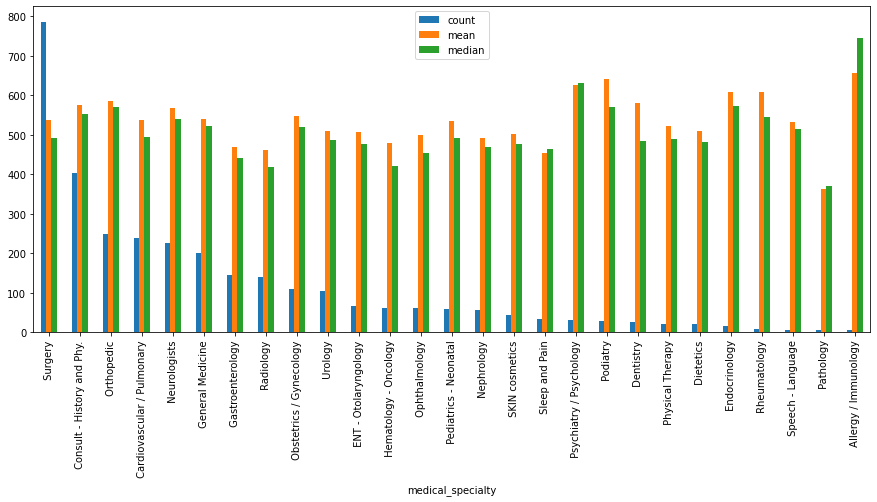

In [41]:
data.groupby('medical_specialty')['tokens'].agg(['count', 'mean', 'median']).sort_values(by = 'count', ascending = False).plot(kind='bar',figsize=(15,6))
plt.ylabel = ("Token Number")
plt.xlabel = ("Medical Spaecialty")
plt.xticks(rotation = 90)
plt.legend(fancybox = True)
plt.savefig('plots/Corpus_view_with_tokens_number_WITHOUTREDUCTION.png')

In [42]:
data.groupby('medical_specialty')['tokens'].agg(['count', 'mean','median']).sort_values(by = 'count', ascending = False)

,count,mean,median
medical_specialty,,,
Surgery,786,537.576336,493.0
Consult - History and Phy.,403,574.253102,552.0
Orthopedic,250,585.252000,571.0
Cardiovascular / Pulmonary,239,537.619247,495.0
Neurologists,227,568.378855,540.0
General Medicine,202,541.148515,522.5
Gastroenterology,146,468.068493,442.5
Radiology,139,460.906475,418.0
Obstetrics / Gynecology,111,547.648649,519.0


In [43]:
data

,description,medical_specialty,sample_name,transcription,tokenized_sents,post_stopwords,tokens
1,Consult for laparoscopic gastric bypass.,Dietetics,Laparoscopic Gastric Bypass Consult - 2,past medical history he has difficulty climbin...,"['past', 'medical', 'history', 'he', 'has', 'd...","[past, medical, history, difficulty, climbing,...",439
2,Consult for laparoscopic gastric bypass.,Dietetics,Laparoscopic Gastric Bypass Consult - 1,history of present illness i have seen abc tod...,"['history', 'of', 'present', 'illness', 'i', '...","[history, present, illness, seen, abc, today, ...",860
5,Morbid obesity. Laparoscopic antecolic anteg...,Dietetics,Laparoscopic Gastric Bypass,"preoperative diagnosis morbid obesity.,postope...","['preoperative', 'diagnosis', 'morbid', 'obesi...","[preoperative, diagnosis, morbid, obesity., ,,...",801
6,"Liposuction of the supraumbilical abdomen, re...",Dietetics,Liposuction,"preoperative diagnoses deformity, right breast...","['preoperative', 'diagnoses', 'deformity', ','...","[preoperative, diagnoses, deformity, ,, right,...",671
8,Suction-assisted lipectomy - lipodystrophy of...,Dietetics,Lipectomy - Abdomen/Thighs,preoperative diagnosis lipodystrophy of the ab...,"['preoperative', 'diagnosis', 'lipodystrophy',...","[preoperative, diagnosis, lipodystrophy, abdom...",267
...,...,...,...,...,...,...,...
4994,Patient having severe sinusitis about two to ...,Allergy / Immunology,Chronic Sinusitis,history i had the pleasure of meeting and eva...,"['history', 'i', 'had', 'the', 'pleasure', 'of...","[history, pleasure, meeting, evaluating, patie...",913
4995,This is a 14-month-old baby boy Caucasian who...,Allergy / Immunology,Kawasaki Disease - Discharge Summary,"admitting diagnosis kawasaki disease.,discharg...","['admitting', 'diagnosis', 'kawasaki', 'diseas...","[admitting, diagnosis, kawasaki, disease., ,, ...",301
4996,A female for a complete physical and follow u...,Allergy / Immunology,Followup on Asthma,subjective this is a 42-year-old white female ...,"['subjective', 'this', 'is', 'a', '42-year-old...","[subjective, 42-year-old, white, female, comes...",830
4997,Mother states he has been wheezing and coughing.,Allergy / Immunology,Asthma in a 5-year-old,chief complaint this 5-year-old male presents ...,"['chief', 'complaint', 'this', '5-year-old', '...","[chief, complaint, 5-year-old, male, presents,...",487


In [44]:
del data['sample_name']

In [45]:
data

,description,medical_specialty,transcription,tokenized_sents,post_stopwords,tokens
1,Consult for laparoscopic gastric bypass.,Dietetics,past medical history he has difficulty climbin...,"['past', 'medical', 'history', 'he', 'has', 'd...","[past, medical, history, difficulty, climbing,...",439
2,Consult for laparoscopic gastric bypass.,Dietetics,history of present illness i have seen abc tod...,"['history', 'of', 'present', 'illness', 'i', '...","[history, present, illness, seen, abc, today, ...",860
5,Morbid obesity. Laparoscopic antecolic anteg...,Dietetics,"preoperative diagnosis morbid obesity.,postope...","['preoperative', 'diagnosis', 'morbid', 'obesi...","[preoperative, diagnosis, morbid, obesity., ,,...",801
6,"Liposuction of the supraumbilical abdomen, re...",Dietetics,"preoperative diagnoses deformity, right breast...","['preoperative', 'diagnoses', 'deformity', ','...","[preoperative, diagnoses, deformity, ,, right,...",671
8,Suction-assisted lipectomy - lipodystrophy of...,Dietetics,preoperative diagnosis lipodystrophy of the ab...,"['preoperative', 'diagnosis', 'lipodystrophy',...","[preoperative, diagnosis, lipodystrophy, abdom...",267
...,...,...,...,...,...,...
4994,Patient having severe sinusitis about two to ...,Allergy / Immunology,history i had the pleasure of meeting and eva...,"['history', 'i', 'had', 'the', 'pleasure', 'of...","[history, pleasure, meeting, evaluating, patie...",913
4995,This is a 14-month-old baby boy Caucasian who...,Allergy / Immunology,"admitting diagnosis kawasaki disease.,discharg...","['admitting', 'diagnosis', 'kawasaki', 'diseas...","[admitting, diagnosis, kawasaki, disease., ,, ...",301
4996,A female for a complete physical and follow u...,Allergy / Immunology,subjective this is a 42-year-old white female ...,"['subjective', 'this', 'is', 'a', '42-year-old...","[subjective, 42-year-old, white, female, comes...",830
4997,Mother states he has been wheezing and coughing.,Allergy / Immunology,chief complaint this 5-year-old male presents ...,"['chief', 'complaint', 'this', '5-year-old', '...","[chief, complaint, 5-year-old, male, presents,...",487


In [46]:
data.shape

(3160, 6)

In [47]:
from collections import Counter
dictionary= data["post_stopwords"].transform(lambda x: Counter(x)).sum()
dictionary

Counter({'past': 1709,
         'medical': 1372,
         'history': 6275,
         'difficulty': 799,
         'climbing': 11,
         'stairs': 36,
         ',': 102521,
         'airline': 4,
         'seats': 4,
         'tying': 28,
         'shoes': 10,
         'used': 2361,
         'public': 13,
         'seating': 7,
         'lifting': 52,
         'objects': 49,
         'floor': 170,
         '.': 82712,
         'exercises': 43,
         'three': 639,
         'times': 454,
         'week': 497,
         'home': 677,
         'cardio': 11,
         'walking': 144,
         'two': 1423,
         'blocks': 17,
         'five': 216,
         'flights': 2,
         'snoring': 43,
         'muscle': 959,
         'joint': 750,
         'pains': 49,
         'including': 684,
         'knee': 721,
         'pain': 3156,
         'back': 1587,
         'foot': 586,
         'ankle': 378,
         'swelling': 398,
         'gastroesophageal': 90,
         'reflux': 155,
        

In [48]:
for k in sorted(dictionary, key=dictionary.get, reverse=True):
    print(k, dictionary[k])

, 102521
. 82712
patient 15931
: 13041
left 7483
right 7341
history 6275
procedure 5259
placed 4996
normal 4197
well 3802
pain 3156
using 2792
anesthesia 2740
skin 2683
incision 2608
performed 2557
removed 2531
blood 2493
also 2487
room 2479
noted 2463
used 2361
without 2340
's 2306
time 2258
diagnosis 2176
anterior 2034
taken 1995
) 1969
artery 1929
mg 1904
( 1854
position 1845
general 1816
past 1709
fashion 1702
closed 1689
operating 1649
chest 1646
area 1641
postoperative 1636
made 1616
upper 1602
back 1587
lower 1571
preoperative 1557
posterior 1519
2 1486
vicryl 1480
1 1480
good 1478
neck 1464
lateral 1458
sterile 1457
x 1449
abdomen 1447
present 1441
pressure 1436
approximately 1432
two 1423
tissue 1397
surgery 1392
one 1377
medical 1372
given 1355
obtained 1352
medications 1345
prepped 1339
suture 1331
disease 1322
significant 1308
draped 1302
cm 1281
dr. 1280
heart 1271
complications 1241
loss 1232
small 1232
denies 1227
clear 1227
examination 1226
catheter 1223
stable 1221
dis

recommend 134
polyps 133
retractor 133
series 133
slight 133
urethra 133
component 133
adjacent 133
adrenal 133
implant 132
affect 132
nondistended 132
puncture 132
prone 132
compartment 132
scalp 132
give 132
abuse 132
even 131
improve 131
locking 131
tympanic 131
yesterday 131
especially 131
drops 131
hole 130
hemostat 130
possibility 130
cauterized 130
anesthetized 130
fascial 130
herniated 130
takes 129
narrowing 129
forearm 129
possibly 129
remainder 129
african-american 129
according 129
information 129
probe 129
hardware 129
endoscopy 128
induction 128
cancer. 128
aspirated 128
whether 128
continues 128
left-sided 128
fossa 128
saturation 128
repaired 128
included 128
decrease 128
palate 128
maxillary 128
eyelid 128
tests 127
appreciated 127
hour 127
scrotal 127
holding 127
rectum 127
margins 127
slowly 127
digital 127
finally 127
border 127
biceps 127
legs 126
vitamin 126
seizures 126
conduction 126
plaque 126
veress 125
debridement 125
working 125
identify 125
heparin 125
star

young 69
cephalad 69
ventral 69
hypertrophy. 69
plans 69
resulting 69
seem 69
vena 69
gravida 69
fibroid 69
suspected 69
doses 69
pituitary 69
coughing 69
0. 69
sugar 68
enhancement 68
rhonchi 68
shaved 68
healed 68
together 68
problems. 68
adenopathy. 68
diplopia 68
viable 68
refractory 68
penrose 68
paraspinal 68
lesions. 68
syringe 68
model 68
hold 68
paracentesis 68
angioplasty 68
bronchus 68
son 68
gradient 68
hallucinations 68
syncope 68
events 68
inner 67
fresh 67
request 67
entirety 67
toward 67
trying 67
epigastric 67
harmonic 67
guarding 67
+ 67
arms 67
dilatation 67
roots 67
sacral 67
secretions 67
gestational 67
paroxysmal 67
candidate 66
consulted 66
widely 66
rather 66
end-stage 66
power 66
cystoscope 66
hyperlipidemia 66
reduce 66
sphincter 66
days. 66
wide 66
surfaces 66
limbus 66
canals 66
rib 66
condyle 66
years. 66
records 66
optic 66
ulceration 66
cheek 66
smokes 65
drift 65
ligation 65
index 65
bronchoscopy 65
calcification 65
postoperatively 65
pneumoperitoneum 65

71-year-old 37
independently 37
dull 37
ilioinguinal 37
cover 37
asleep 37
bleeders 37
bard-parker 37
towel 37
fingerbreadths 37
stripped 37
afebrile. 37
pneumonia. 37
refills 37
consent. 37
ask 37
t.i.d. 37
raising 37
detachment 37
relieve 37
basilar 37
41-year-old 37
rongeurs 37
medicines 37
l3 37
acl 37
spacer 37
laxity 37
collapse 37
protamine 37
inch 37
radiographic 37
brisk 37
sat 37
a1 37
c-section 37
toe. 37
therapeutic 37
listed 37
2-mm 37
regard 37
ulcerations 37
ambulating 37
traumatic 37
respond 37
agree 37
synovial 37
bleed 37
synthes 37
malleolus 37
guarded 37
reevaluation 37
pylorus 37
scars 37
compatible 37
dad 37
recreational 37
snack 37
emesis 37
stairs 36
creating 36
stapled 36
corrected 36
takeoff 36
hips 36
films 36
dorsalis 36
1:200,000 36
compromise 36
april 36
10 36
48-year-old 36
supportive 36
containing 36
toradol 36
ligature 36
cramping 36
body. 36
back. 36
indicating 36
lift 36
mac 36
iodine 36
seeds 36
happy 36
sulcus 36
fistula. 36
sensing 36
retrobulbar 3

disposable 24
glottic 24
phenomenon 24
intermedius 24
q.d 24
amiodarone 24
epistaxis 24
ostomy 24
seborrheic 24
alkaline 24
cmp 24
polypectomy 24
hamate 24
de 24
parameters 24
3-year-old 24
observe 24
spondylosis. 24
marijuana 24
fluency 24
accuracy 24
tasks 24
lupus 24
lopressor 24
petechiae 24
spect 24
bulk. 24
rle 24
patellae 24
tid 24
imuran 24
hemorrhages 24
ica 24
psychotic 24
sees 24
compliant 24
nonfocal 24
wheezes. 24
walks 24
inhaler 24
glaucoma. 24
normocephalic. 24
pnd 24
gallstones 23
fatty 23
mesentery 23
inframammary 23
carry 23
slurred 23
bloody 23
ulcerative 23
st. 23
sterilization 23
dictation 23
bph 23
meantime 23
incontinence. 23
strictures 23
personally 23
reapproximate 23
bundles 23
complex. 23
4th 23
64-year-old 23
friend 23
college 23
transposition 23
modalities 23
partner 23
stalk 23
signs. 23
management. 23
communicating 23
twisted 23
tegaderm 23
corresponding 23
2.0 23
tells 23
empty 23
freeing 23
indirect 23
ended 23
discomfort. 23
dizzy 23
illegal 23
observ

hyperplasia 16
channel 16
82-year-old 16
pyelograms 16
chocolate 16
kg. 16
emergently 16
ta 16
twist 16
violation 16
modest 16
prostatectomy 16
hopes 16
foul 16
exchange. 16
degrees. 16
gerota 16
bridges 16
erection 16
ventrum 16
preserving 16
operate 16
refusing 16
functioning 16
gastroenterology 16
diagnosis. 16
orchiopexy 16
testis. 16
inhalational 16
bottom 16
rapide 16
testes. 16
benzoin 16
tack 16
electrocautery. 16
suturing 16
phimosis 16
endoshears 16
ligating 16
______ 16
hydrocele. 16
penoscrotal 16
72-year-old 16
labored 16
sensitive 16
enalapril 16
reasonably 16
hydronephrosis. 16
2.7 16
criteria 16
1to 16
develops 16
point. 16
board 16
checkup 16
helping 16
gun 16
materials 16
restriction 16
cordis 16
inferotemporal 16
sclerotomy 16
atropine 16
hence 16
curettage. 16
protruding 16
1-year-old 16
fcu 16
ocuflox 16
fimbriated 16
incus 16
paramedian 16
radiograph 16
intra-abdominal 16
mris 16
kit 16
malnutrition 16
overt 16
suprapatellar 16
perpendicular 16
sealed 16
maximus 1

risks. 12
corticosteroids. 12
sheets 12
flows 12
cineangiograms 12
phasic 12
conference 12
intracerebral 12
conventional 12
lined 12
versed. 12
ulna 12
0.k-wire 12
1-mm 12
capital 12
phenol 12
topical. 12
diopter 12
tactile 12
venogram 12
senile 12
phacoemulsified 12
hydrodissected 12
14-year-old 12
malnutrition. 12
plana 12
probing 12
loaded 12
4-6 12
left-to-right 12
thin-walled 12
1234. 12
2.2 12
millivolts 12
quadratus 12
supination 12
dead 12
widening 12
18-mm 12
iodoform 12
bias 12
dispensed 12
pathway 12
bed. 12
10/mm 12
redo 12
flap. 12
pneumo 12
fds 12
fdp 12
submucous 12
00 12
advantages 12
fluoro 12
10-blade 12
lordosis 12
twitching 12
high-risk 12
requests 12
labor. 12
oligohydramnios. 12
tenting 12
two-layer 12
peritonitis 12
metacarpal 12
commissure 12
epiglottic 12
thigh. 12
polyp. 12
sigmoidoscopy 12
calot 12
endocrinology 12
distension 12
retrieval 12
kyphoplasty 12
laterolisthesis 12
coblator 12
below. 12
nonhealing 12
adjust 12
nephrology 12
strip 12
elevators 12
pos

transmission 9
gerd. 9
stricture. 9
hesitancy 9
habitus. 9
caffeinated 9
distorted 9
blanching 9
cytology. 9
classification 9
recommended. 9
va 9
washing 9
lengthy 9
2ml 9
sting 9
remarkably 9
evacuate 9
utis 9
basket 9
interaction 9
somebody 9
waited 9
risky 9
prognostic 9
deficiency. 9
broad-based 9
cultures. 9
vertebra 9
apex. 9
air-fluid 9
preplaced 9
applications 9
needle. 9
bend 9
tries 9
establishing 9
pureed 9
ulnaris 9
anteriorly. 9
coag 9
anteroinferior 9
constricted 9
tun-l 9
radiograph. 9
epimed 9
rk 9
classical 9
lyses 9
ellis 9
applicator 9
recommendations. 9
expect 9
hypotensive 9
shorter 9
waveform 9
procedures. 9
tracheostomy. 9
surgeons 9
innominate 9
baseplate 9
noticeable 9
sh 9
23-hour 9
extramedullary 9
pressurized 9
econopred 9
fio2 9
meniscectomy 9
preceding 9
diameter. 9
intraoperatively. 9
disturbance 9
beds 9
non 9
systematically 9
sampled 9
loculations 9
end-to-end 9
inflate 9
t8-t9. 9
pituitaries 9
dramatic 9
1.7 9
palm. 9
thenar 9
lightly 9
navicula 9
oste

swings. 8
weekly. 8
januvia 8
icd 8
gluten-free 8
budget 8
recognizing 8
transumbilical 8
supermorbid 8
pulmozyme 8
seating 7
lowest 7
cheese 7
anastomosis. 7
joined 7
medialization 7
ringers 7
coursemri 7
+1 7
comorbidities. 7
consultations 7
dietician 7
socket 7
hungry 7
cauterized. 7
scds 7
nystatin 7
passively 7
voided 7
cystoscopic 7
orchiectomy 7
sling. 7
smelling 7
prostatitis 7
mesh. 7
cipro. 7
pneumococcal 7
examinationheent 7
robotic-assisted 7
notably 7
hemorrhoidal 7
pharyngitis. 7
8respiratory 7
er. 7
myalgias 7
nourished. 7
tums 7
well-appearing 7
grabbed 7
14.hematocrit 7
resuscitation 7
smokers 7
10-day 7
post-operative 7
vesicle 7
stimulate 7
pinched 7
aseptically 7
63-year-old 7
reevaluated 7
adhesiolysis 7
extubation 7
electively 7
onlay 7
reiterated 7
sizeable 7
polydek 7
bulbar 7
replacements. 7
drinking. 7
drink. 7
34. 7
warts 7
fevers. 7
0.0guidewire 7
predominant 7
culture. 7
fluttering 7
3-5 7
huge 7
begins 7
warmer 7
dosing 7
holiday 7
kenalog 7
noninvasive 7


post-dilated 6
findingsleft 6
culprit 6
ra 6
4.9 6
swan 6
vasodilator 6
lytic 6
label 6
dilatations 6
mid-portion 6
branch. 6
phlebitis. 6
gastroscopy. 6
esophagus. 6
retroflex 6
tts 6
non-restorable 6
apron 6
fluoridated 6
dentin 6
undraped 6
radiocapitellar 6
hemophilia 6
thursdays 6
gastroparesis. 6
bleeder 6
somehow 6
sub-segment 6
tracheobronchitis 6
laryngoscopy. 6
frameless 6
conformality 6
1.and 6
permitted 6
named 6
l3l4l5s1. 6
lfacet 6
lthis 6
run-off 6
pulse. 6
d1 6
7lesion. 6
c6. 6
pseudomeningocele 6
sseps 6
emgs 6
silent 6
tisseel 6
subjectively 6
shelled 6
trichloroacetic 6
intent 6
photography 6
videoscope 6
jejunostomy 6
gif 6
rugal 6
aphthous 6
rectosigmoid 6
remicade 6
drip. 6
protonix. 6
anatomy. 6
cholangiopancreatography 6
mrcp 6
3total 6
excisions 6
graftings. 6
autografting 6
epinephrine-soaked 6
engraftment 6
quadriplegia. 6
beaumont 6
ballooned 6
2mm/hg 6
epb 6
lifelong 6
faster 6
pharynx. 6
break-away 6
streaking 6
eosinophilic 6
y-v 6
plasty 6
overlap 6
tend

crepitance 5
non-hyperinflated 5
glad 5
k-dur 5
atarax 5
1heart 5
314,000. 5
4cm 5
cranium 5
8. 5
2milliseconds 5
calculi 5
predicted 5
urinated 5
d/o 5
hf 5
0/1 5
chest-abdominal-pelvic 5
3000cgy 5
workload 5
impressionpartial 5
synovitis. 5
flaxseed 5
1992 5
fhxunremarkable. 5
farmer 5
lucid. 5
complexes. 5
missionary 5
non-weight 5
1:3 5
3.total 5
1.09 5
regained 5
yielded 5
1rbc 5
couch 5
7.5mg 5
plegic 5
11.0 5
myelitis 5
manifestation 5
52y/o 5
bcnu 5
non-radiating 5
1+/throughout 5
down-going 5
histiocytes 5
ns 5
cgy 5
medulla 5
altace 5
3+/3+ 5
adductors 5
5/knee 5
1.ptt 5
interpretations 5
nerves. 5
strain. 5
neuritis 5
epicondylitis 5
44y/o 5
coincidentally 5
listing 5
rle. 5
14-20 5
produces 5
hw 5
hoffman 5
fttsh 5
15-45 5
somatosensory 5
season 5
encephalitis 5
11/8/9revealed 5
rhythmic 5
chiropractor 5
50cgy 5
climb 5
ngt 5
oxybutynin 5
kitchen 5
slower 5
igm 5
collision. 5
1ptt 5
confluent 5
extraaxial 5
calvarial 5
diflucan 5
nsaids. 5
2-d 5
ii/vi 5
classes 5
fio2. 5
an

sedative 4
derangement 4
unaffected 4
spigot 4
cocktail 4
disabling 4
methacrylate 4
t1l2 4
hv-r 4
11-gauge 4
tamp 4
radiopaque 4
tvertebral 4
0.to 4
below-the-knee 4
one-eighth-inch 4
2the 4
juxtarenal 4
repaired. 4
leak. 4
keratoplasty. 4
09/0 4
aphakia. 4
7.5-mm 4
trephine 4
synechiae 4
27759 4
900. 4
transitioned 4
subtrochanteric 4
85-mm 4
uremia. 4
awful 4
8-inch 4
masticatory 4
models 4
ilium 4
palatine 4
re-contoured 4
08/30/2003 4
perm-a-cath 4
scrubbing 4
peroxide 4
998.59 4
mid-shaft 4
shortening. 4
concrete 4
alignment. 4
mature 4
measured. 4
1:20,000 4
loosen 4
troubles 4
introduction 4
hysteroscopic 4
hagar 4
diagnoses1.stage 4
pain.,2.status 4
parous 4
enterolysis 4
peristalsis 4
ringer 4
ringer's. 4
coils 4
bullosa 4
complicating 4
matters 4
addressing 4
para-aortic 4
straw-colored 4
thighthis 4
boat 4
systemscardiac 4
ssor 4
skinning 4
vulvectomy. 4
tapes 4
bicep 4
systemically 4
branchial 4
briskly 4
3-pin 4
tip. 4
administrated 4
corresponds 4
match 4
moderate-calibe

keratoses 4
unaided 4
+0.times 4
opacities 4
undilated 4
plendil 4
pravastatin. 4
corneas 4
fovea 4
israel 4
seasonale 4
optically 4
stickler 4
progresses 4
restricting 4
tummy 4
soda 4
locomotor 4
performs 4
thought. 4
three-week 4
vitamins. 4
desirous 4
hands. 4
women 4
urination. 4
cin 4
alcoholism. 4
gc 4
acetowhite 4
a/p 4
s. 4
allergies/intolerances. 4
gynecologic 4
stuffiness 4
99.1 4
about. 4
cooking 4
adult-onset 4
1-0-0-at 4
macrobid 4
microinvasive 4
pleasant. 4
tampon 4
adriamycin 4
seroma 4
8.and 4
current. 4
anomalies 4
cholestasis 4
100.3 4
nm0 4
2.0. 4
tinetti 4
welcome 4
input 4
guess 4
drooping 4
tias. 4
10/3mg 4
herself. 4
imitrex 4
dimming 4
wilmer 4
myeloma. 4
unobtainable. 4
neurocutaneous 4
provoked 4
aids 4
differentiation 4
characterize 4
myoclonus 4
unresponsiveness 4
azithromycin. 4
sluggishly 4
concur 4
recollection 4
cabinet 4
600s 4
lovaza 4
shepherd 4
polio 4
ucsf 4
kilo 4
update 4
25-pound 4
62. 4
8temperature 4
dysphasia 4
temporal/sphenoid 4
regrowth 4

c5-cas 3
distractor. 3
nicely. 3
microscope. 3
sternoclavicular 3
interspace. 3
shadow-line 3
succession 3
atlantis 3
c3-cc4-c5. 3
c3-cc4-c5 3
anulus 3
fibrosus 3
c3-csecured 3
630763076 3
22552258utilizing 3
c5-and 3
surgifoam 3
post-placement 3
recalcitrant 3
operatively. 3
accommodated 3
inline 3
gardner-wells 3
tongs 3
thrombin-soaked 3
distractions 3
tamped 3
interference 3
pull-out 3
forces 3
14-mm 3
c3-cc2-c3. 3
c2-cc3-c4. 3
plates. 3
c2-c 3
all-purpose 3
c4-cwe 3
c3-c 3
55-mm 3
superb 3
c5-cc6-cc7-t1 3
acf 3
transligamentous 3
fashioning 3
ledge 3
c5. 3
cpart 3
ball-ended 3
blackstone 3
free-running 3
tilts 3
shoots 3
mouse 3
07/03/2007. 3
self-retained 3
spacing 3
sunk 3
valsalved 3
cleaned. 3
osteophytes. 3
castoff 3
overhanging 3
spondylitic 3
tissue-paper-thin 3
endplate. 3
referable 3
prepared. 3
overgrowth. 3
excepted 3
patiently 3
widely. 3
steffee 3
commenced. 3
donut 3
platysmata 3
neuroforamen 3
align 3
ctwo 3
motor-evoked 3
140/mmhg 3
grand 3
fountain 3
methamphetami

aranesp 3
measurable 3
hydrea 3
13.3 3
11.8 3
12th 3
11.6 3
patches. 3
13.lymphocyte 3
26,000 3
requisition 3
19he 3
vincristine 3
7400 3
diphenhydramine 3
demented 3
magnesia. 3
soma. 3
zoloft. 3
namenda.,1 3
buspar.,1 3
detrol.,1 3
coreg.,1 3
colace.,1 3
calcium.,1 3
zantac.,1 3
lasix.,1 3
seroquel.,20 3
aldactone.,2 3
104/4and 3
brady. 3
rebound. 3
vera 3
hydroxyurea 3
disappeared 3
14.8 3
chlorambucil 3
selenium 3
omega-3 3
13.0 3
cellular 3
meaningful 3
flopping 3
pci/cabg 3
nitro 3
early-to-mid 3
shrimp 3
librarian 3
138/to 3
111/8pulse 3
waxes 3
wanes 3
vocalization 3
ssregular 3
droop. 3
diagnostic/laboratory 3
16troponin 3
0.1inr 3
1.2white 3
1.hematocrit 3
3platelet 3
179. 3
canalized 3
preload 3
thinners 3
discussion. 3
200status 3
140. 3
malignancies. 3
levoxyl 3
maalox 3
leukemoid 3
1.with 3
greenish 3
interpret 3
streptococcal 3
abrogated 3
nondescript 3
2.normal 3
reversing 3
xigris 3
abrogation 3
tn0 3
unsightly 3
50. 3
aunts 3
serevent 3
crab 3
mobster. 3
dakota 3
coll

tympani 2
rosette 2
cruse 2
incostapedial 2
downfractured 2
4.mm 2
crimper 2
perilymph 2
incudo-prosthesis 2
reno 2
condition/dysfunction 2
mua- 2
implied 2
gowning 2
twilight 2
desired. 2
thrust 2
posterior/superior 2
ti-ti 2
cavitation 2
spine/sacro-iliac 2
patrick-fabere 2
assisting 2
stabling 2
lumbo-pelvic 2
ecrl 2
ecrb 2
devoid 2
slac 2
ebi 2
q.3-4h 2
split-thickness 2
84-year 2
granulating 2
pulsavaced 2
0.0inch 2
1:1.5 2
biter 2
merocels 2
bacitracin-coated 2
meroceles 2
axing 2
intranasally 2
1.3-mm 2
mucocele 2
seeker 2
nasofrontal 2
fan-folded 2
forced 2
periorbit 2
boies 2
orthoplast 2
kennedy 2
conclusive 2
shuntogram 2
1:200,000. 2
oxacillin. 2
reprepped 2
gushing 2
pumped 2
galeal 2
dornier 2
lithotriptor 2
2500 2
new. 2
diamox. 2
noncemented. 2
saber 2
tenodesed 2
prongs 2
extensions 2
hakim 2
0/progav 2
tubings 2
helix 2
self-absorbing 2
endodermal 2
reenforce 2
envelopes 2
antrostomies 2
25-degrees 2
saphenofemoral 2
difficult. 2
tributary 2
femorosaphenous 2
intersec

nonhemorrhagic. 2
performedfiberoptic 2
nasolaryngoscopy. 2
08/17/03 2
prior. 2
detailsthe 2
oro 2
performedemergent 2
164. 2
anesthesia/sedation 2
09/04/03 2
asynchrony 2
tissue/clots 2
impactions/tissue 2
plugging 2
9throughout 2
cannulation. 2
wholey 2
royal 2
140/70. 2
d1. 2
7lesion 2
oms 2
2lesion. 2
brushings 2
bacteriologic 2
caseous 2
friability. 2
midtrachea 2
assurance 2
,500 2
enveloping 2
enabled 2
enveloped 2
ascertain 2
sigmoidoscopy. 2
attaching 2
re-prepped 2
3degree 2
perforate 2
doughnuts 2
doyen 2
bubble 2
nonreducible 2
nevi. 2
ellman 2
pyloroplasty 2
sageman 2
recoverable 2
bolstered 2
antrostomy. 2
ethmoidectomy. 2
debrider 2
olive-tip 2
regimens 2
dyspeptic 2
antrum. 2
erosion. 2
gif-q180. 2
incisura 2
postbulbar 2
met. 2
penny. 2
portoenterostomy 2
cholestatic 2
penny 2
inducing 2
nasoenteric 2
photo. 2
08/18/2003 2
encephalopathic 2
ventilator-dependency 2
granules. 2
retroflexing 2
transilluminating 2
photograph 2
deflected 2
pancreaticoduodenectomy. 2
boarded

321,000 2
protopic 2
evolves 2
full-blown 2
polymyositis. 2
diovan. 2
rheumatologic 2
114/55. 2
zoster. 2
11.platelets 2
4.creatinine 2
5.3cpk 2
3bnp 2
64troponin 2
0.04. 2
impressionthe 2
inclusion 2
recommendationsi 2
henoch-schonlein 2
99.2 2
45.9 2
123/5height 2
149.5 2
03/2007 2
104.6 2
108/is 2
91.0 2
visceromegaly 2
hypermobile 2
hla-bnegative. 2
evaluationfetal 2
135bpm 2
cephalic. 2
placentral 2
biometrybpd 2
9.0cm 2
1day 2
6.9cm 2
35weeks 2
3days 2
38weeks 2
ci 2
bpd/ofd 2
70-873 2
fl/bpd 2
71-877 2
fl/hc 2
20.8-22.19.9 2
fl/ac 2
20-220 2
hc/ac 2
0.92-1.01.00 2
06/04/07. 2
0days. 2
05/18/07. 2
03/05/07. 2
05/24/07. 2
anatomyfetal 2
impressionactive 2
afi=4cm 2
efw 2
insult. 2
exclusion 2
negativity 2
all-inclusive 2
self-stated 2
oximetric 2
multi-plane 2
to-and-fro 2
jets 2
cusps 2
reader 2
20rvsp 2
0.m/sec 2
svc 2
appendage. 2
jets. 2
atherosclerosis. 2
similar. 2
04/18/200decreased 2
aids. 2
echogenicity. 2
numbed 2
planimetry. 2
cardioversion. 2
ventricle.,1 2
present.,1 

showering 2
cheyenne 2
wyoming 2
10/13/hct 2
cigar 2
driver. 2
193/7 2
subhyaloid 2
pp/vib. 2
10/13/9this 2
vasospasm 2
10/19/revealed 2
laca-lpca 2
2/26/in 2
angio. 2
01/23/0this 2
intermixed 2
discloses 2
ccfalling 2
26y/orhf 2
unequal 2
ophthalmologist. 2
pmhright 2
hyperopia 2
1year 2
138/1 2
4/2 2
3/1 2
deviates 2
prop/vib 2
fnf/hks/ram 2
2+/achilles 2
carotid/vertebral/cranial 2
2/2/9was 2
2/3/which 2
neuro-opthalmology 2
horner 2
10/noted 2
invention 2
arteriograms. 2
cross-filling 2
parked 2
vasoseal 2
ccheadache 2
yawned. 2
blend 2
signals 2
15oz 2
dyslexia 2
pgf 2
22yr 2
shxlives 2
attends 2
classes. 2
bp124/hrrr37 2
ependymoma 2
neurocytoma 2
1/25/9upon 2
rcca 2
choroidal 2
1/28/9pathological 2
glial 2
angioma/malformation 2
0.9m/second. 2
0.170. 2
0.204 2
m/second 2
belowleft 2
0.6m/second 2
0.1m/second. 2
0.2m/second 2
0.89left 2
0.56left 2
0.20again 2
injections. 2
applicable. 2
nonsedated 2
engagement 2
v-tech 2
0.035-inch 2
patent.,3 2
summed 2
in. 2
mm/dd/yy 2
laterome

stagnant 2
discern 2
synechia 2
nongranulomatous 2
hla-b2rheumatoid 2
pis 2
know. 2
guttata 2
upset. 2
vf 2
o.u. 2
tonometry 2
0.condition 2
keratometryod 2
35.875 2
41.875 2
lids/orbit 2
quiet. 2
stroma 2
endothelium 2
cupping. 2
acuityvisual 2
uncorrected 2
20/os 2
20/ou 2
20/15. 2
refractionlenses 2
finalod 2
+0.+1.x 2
1.75 2
+6.00 2
+3.x 2
4.00 2
fresnel 2
20/25 2
near. 2
pityrosporum 2
goldberg 2
20/-2 2
20/+2 2
j2 2
-0.50 2
1in 2
20/1 2
-1.00 2
005 2
11.in 2
presbyopia 2
astigmatism. 2
non-visually 2
commence 2
preservision 2
capulets 2
suspicion. 2
braithwaite 2
refraction. 2
v-optic 2
eltroxin 2
cosopt. 2
ou. 2
overtly 2
subretinal 2
pseudophakia 2
mid-to-high 2
xalatan. 2
laxity. 2
-0.sphere 2
20/od 2
-3.+1.x 2
0on 2
-2.+0.x 2
0.ou 2
myopia 2
sectoral 2
ultraviolet 2
shopping 2
well-woman 2
rosacea 2
addict. 2
116/7 2
chem-1lipid 2
01/18/0and 2
burning. 2
143/8pulse 2
66.5 2
01/28/08 2
hysterectomy/bilateral 2
radiologically. 2
antihypertensives 2
elevated. 2
mentioning 2
alte

3.uric 2
4.bilirubin 2
41. 2
bwas 2
45,000 2
05/16/200 2
flushes 2
loperamide 2
caspofungin 2
ertapenem 2
105/6and 2
pre-albumin. 2
doubtful 2
absorption 2
myelopoiesis 2
uoq 2
sampling. 2
5progesterone 2
2s-phase 2
neu 2
tnm 2
m0. 2
12/9last 2
f.o.b 2
10/99-xlast 2
8history 2
54. 2
19- 2
12/27/0as 2
tomball 2
12/21/0the 2
197laparotomy 2
198198and 2
1987. 2
indigestion. 2
asbestosis 2
t1c 2
neoadjuvant 2
brochures 2
arimidex 2
zometa 2
hospitalists 2
199 2
oligodendroglioma 2
dictate. 2
summary. 2
200due 2
146/9pulse 2
1platelets 2
13calcium 2
9.1. 2
jeopardize 2
abbott 2
northwestern 2
re-biopsy 2
held. 2
pacerone 2
sick. 2
syrup 2
puffy 2
thrombolysis 2
1999 2
tempe 2
luke 2
grounds 2
racemic 2
chill 2
194/12pulse 2
bunch 2
9after 2
decompensation 2
prescribing 2
antidepressant 2
related. 2
cuba 2
10-days 2
gingiva 2
quiescent 2
therapyi 2
stored 2
lidex 2
revocation 2
12/19/200had 2
risperdal. 2
immigrated 2
198although 2
methamphetamines 2
xyz. 2
125/7 2
endorse 2
derm 2
perineum/

ketone 2
emphasized 2
carbohydrates. 2
4of 2
charlie 2
athene 2
1two-hour 2
rearranged 2
handles 2
3of 2
vegetarian 2
cappuccino 2
quiche 2
crescents 2
vending 2
machines 2
biking 2
triathlon 2
efforts. 2
204 2
03/07/0 2
26.18 2
03/15/0 2
vldl 2
2,300 2
booklet 2
topic 2
11.activity 2
2,800 2
receptive. 2
supper. 2
educator 2
1280 2
10two-hour 2
2.p.m 2
unawareness 2
dka 2
47 2
charla 2
yassine 2
30.5 2
lilly 2
provided. 2
taught 2
insulin-to-carbohydrate 2
15-g 2
joanne 2
araiza 2
10-g 2
objectivevitals 2
wasp 2
occurs. 2
08/02/200comes 2
bathes 2
mechanic. 2
winces. 2
aristocort 2
tazorac 2
blackheads. 2
oily 2
shampoo 2
dandruff 2
22-days 2
alesse-2mcg-0.mg 2
08/07/2001 2
obstetrician-gynecologist 2
reproductive 2
measles. 2
eccrine 2
apocrine 2
hyperidrosis 2
chromidrosis 2
bromhidrosis 2
papule. 2
vulgaris. 2
premolar 2
achieves 2
re-fusion 2
02/05 2
circulator 2
12-system 2
3breast. 2
tanned 2
piercing 2
hypomastia 2
3cubic 2
accentuate 2
rep 2
engages 2
ramipril 2
expanders 2
ir

intravertebral 1
oncologist. 1
all. 1
198gerd 1
teratoma 1
finance 1
shakes 1
176/9pulse 1
softly 1
4-5/5. 1
halls 1
malarone 1
anti-malarial. 1
nkda 1
rerupture 1
¼ 1
tide 1
samplesample 1
pdt 1
handheld 1
magnifier 1
help. 1
refractive 1
0.print 1
loaned 1
fine-detailed 1
o.d 1
20/bilaterally 1
3degrees. 1
check-ups 1
halos 1
alevels 1
1taken 1
weremmhg 1
2:03 1
meshwork 1
gonio-compression 1
appositional 1
synechial 1
iridectomies 1
0.in 1
fdt 1
gdx 1
applanations 1
conj 1
fuchs 1
20/50 1
20/80 1
1od 1
maculae 1
gastroenterologic 1
transparency 1
fogged 1
steam. 1
sunlight. 1
detection 1
diabetics 1
sunlight 1
sunglasses 1
uv 1
eyeglasses 1
anti-uv 1
coating 1
million 1
9without 1
guaranteed 1
breastfeeding 1
half-sister 1
3is 1
96/5 1
10/18/0 1
39. 1
involuting. 1
hemorrhoid 1
anoscope 1
cautioned 1
proctofoam 1
micronor 1
anticipates 1
six-week 1
32.8 1
7.9 1
25.2. 1
6/17/2009 1
pregnancy-induced 1
toxemia 1
child-bearing 1
hydatiform 1
mimics 1
fluid-build 1
symptomsmild 1
trimes

2/3rd 1
130/73. 1
reaccumulate 1
permit 1
seals 1
accumulate 1
outgrow 1
specialty 1
comprises 1
hyperlipidemic 1
144. 1
symlin 1
polyphagia. 1
148/8and 1
91.kg 1
phase. 1
10/05/08 1
22triglyceride 1
11calcium 1
1.07 1
0.81. 1
1.02 1
1.7and 1
carb/insulin 1
tire 1
hyperdefecation 1
1micrograms 1
glucotrol. 1
avandamet. 1
96.pulse 1
135/6and 1
85.7 1
08/29/07 1
1.3and 1
0.121. 1
planthis 1
ttsh 1
0.or 1
03/06 1
fishing 1
blackman 1
9his 1
oak. 1
one-a-day 1
jacket 1
wasps 1
anaphylaxis-type 1
14-day-old 1
pinks 1
pustule 1
completeness 1
vietnamese 1
07/13/0 1
d.o 1
sunburns 1
08/10/200 1
photofacials 1
secretary. 1
benzoyl 1
daypro. 1
folliculitis-like 1
eruptions 1
females. 1
blackheads 1
pinhead. 1
whiteheads 1
pustules 1
causesoil 1
sex-hormone 1
backs 1
uncleanliness 1
masturbation 1
prevented. 1
temperatures. 1
cortisones 1
hormones 1
cosmetics. 1
discover 1
winter. 1
unscented 1
antibacterial 1
washcloth 1
harbor 1
astringent 1
rubbing 1
rinses. 1
exercising. 1
water-based 1
cosm

# Lemmatizer

In [49]:
from nltk.stem.wordnet import WordNetLemmatizer

lmtzr = WordNetLemmatizer()

data['Lemmatize'] = data['post_stopwords'].apply(lambda lst:[lmtzr.lemmatize(word) for word in lst])

print(data['Lemmatize'])

1       [past, medical, history, difficulty, climbing,...
2       [history, present, illness, seen, abc, today, ...
5       [preoperative, diagnosis, morbid, obesity., ,,...
6       [preoperative, diagnosis, deformity, ,, right,...
8       [preoperative, diagnosis, lipodystrophy, abdom...
                              ...                        
4994    [history, pleasure, meeting, evaluating, patie...
4995    [admitting, diagnosis, kawasaki, disease., ,, ...
4996    [subjective, 42-year-old, white, female, come,...
4997    [chief, complaint, 5-year-old, male, present, ...
4998    [history, 34-year-old, male, present, today, s...
Name: Lemmatize, Length: 3160, dtype: object


In [50]:
data = data.reset_index(drop=True)
data.sample(10)

,description,medical_specialty,transcription,tokenized_sents,post_stopwords,tokens,Lemmatize
2104,Patient with a diagnosis of stroke.,General Medicine,"chief complaint altered mental status.,history...","['chief', 'complaint', 'altered', 'mental', 's...","[chief, complaint, altered, mental, status., ,...",662,"[chief, complaint, altered, mental, status., ,..."
2236,Laparoscopic cholecystectomy. Acute cholecys...,Gastroenterology,"procedure laparoscopic cholecystectomy.,disch...","['procedure', 'laparoscopic', 'cholecystectomy...","[procedure, laparoscopic, cholecystectomy., ,,...",566,"[procedure, laparoscopic, cholecystectomy., ,,..."
2536,Well-child check and school physical.,Consult - History and Phy.,chief complaint well-child check and school p...,"['chief', 'complaint', 'well-child', 'check', ...","[chief, complaint, well-child, check, school, ...",431,"[chief, complaint, well-child, check, school, ..."
2948,Ligation and stripping of left greater saphen...,Cardiovascular / Pulmonary,"preoperative diagnosis varicose veins.,postop...","['preoperative', 'diagnosis', 'varicose', 'vei...","[preoperative, diagnosis, varicose, veins., ,,...",767,"[preoperative, diagnosis, varicose, veins., ,,..."
197,"Painful enlarged navicula, right foot. Osteo...",Surgery,preoperative diagnoses painful enlarged navicu...,"['preoperative', 'diagnoses', 'painful', 'enla...","[preoperative, diagnoses, painful, enlarged, n...",962,"[preoperative, diagnosis, painful, enlarged, n..."
1456,"C5-C6 anterior cervical discectomy, allograft...",Orthopedic,procedures performed c5-c6 anterior cervical d...,"['procedures', 'performed', 'c5-c6', 'anterior...","[procedures, performed, c5-c6, anterior, cervi...",495,"[procedure, performed, c5-c6, anterior, cervic..."
577,Bilateral facet Arthrogram and injections at ...,Surgery,preoperative diagnosis low back syndrome - low...,"['preoperative', 'diagnosis', 'low', 'back', '...","[preoperative, diagnosis, low, back, syndrome,...",522,"[preoperative, diagnosis, low, back, syndrome,..."
980,MRI brain (Atrophy Left fronto-temporal lobe)...,Radiology,"ccfall with subsequent nausea and vomiting.,hx...","['ccfall', 'with', 'subsequent', 'nausea', 'an...","[ccfall, subsequent, nausea, vomiting., ,, hxt...",767,"[ccfall, subsequent, nausea, vomiting., ,, hxt..."
868,Laparoscopic appendectomy and peritoneal toil...,Surgery,"preoperative diagnosis acute appendicitis.,po...","['preoperative', 'diagnosis', 'acute', 'append...","[preoperative, diagnosis, acute, appendicitis....",530,"[preoperative, diagnosis, acute, appendicitis...."
1638,Dilation and curettage (D&C) and hysteroscopy...,Obstetrics / Gynecology,preoperative diagnoses abnormal uterine bleedi...,"['preoperative', 'diagnoses', 'abnormal', 'ute...","[preoperative, diagnoses, abnormal, uterine, b...",616,"[preoperative, diagnosis, abnormal, uterine, b..."


In [51]:
data["Lemmatize"][0][0]

'past'

In [52]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Thirumalai\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

# pos_tag

In [53]:
from nltk import pos_tag

nltk.tag.pos_tag(data['Lemmatize'][0])

[('past', 'JJ'),
 ('medical', 'JJ'),
 ('history', 'NN'),
 ('difficulty', 'NN'),
 ('climbing', 'VBG'),
 ('stair', 'NN'),
 (',', ','),
 ('difficulty', 'NN'),
 ('airline', 'NN'),
 ('seat', 'NN'),
 (',', ','),
 ('tying', 'VBG'),
 ('shoe', 'NN'),
 (',', ','),
 ('used', 'VBN'),
 ('public', 'JJ'),
 ('seating', 'NN'),
 (',', ','),
 ('lifting', 'VBG'),
 ('object', 'JJ'),
 ('floor', 'NN'),
 ('.', '.'),
 ('exercise', 'NN'),
 ('three', 'CD'),
 ('time', 'NN'),
 ('week', 'NN'),
 ('home', 'NN'),
 ('cardio', 'NN'),
 ('.', '.'),
 ('difficulty', 'NN'),
 ('walking', 'VBG'),
 ('two', 'CD'),
 ('block', 'NN'),
 ('five', 'CD'),
 ('flight', 'NN'),
 ('stair', 'NN'),
 ('.', '.'),
 ('difficulty', 'NN'),
 ('snoring', 'VBG'),
 ('.', '.'),
 ('muscle', 'NN'),
 ('joint', 'JJ'),
 ('pain', 'NN'),
 ('including', 'VBG'),
 ('knee', 'NN'),
 ('pain', 'NN'),
 (',', ','),
 ('back', 'RB'),
 ('pain', 'NN'),
 (',', ','),
 ('foot', 'NN'),
 ('ankle', 'NN'),
 ('pain', 'NN'),
 (',', ','),
 ('swelling', 'VBG'),
 ('.', '.'),
 ('gastro

In [54]:
data.sample(5)

,description,medical_specialty,transcription,tokenized_sents,post_stopwords,tokens,Lemmatize
2609,Initial obstetrical examination - Normal firs...,Consult - History and Phy.,"chief complaint,: this year-old female presen...","['chief', 'complaint', ',', ':', 'this', 'year...","[chief, complaint, ,, :, year-old, female, pre...",667,"[chief, complaint, ,, :, year-old, female, pre..."
2249,Gastroscopy. A short-segment Barrett esophag...,Gastroenterology,"procedure gastroscopy.,preoperative diagnosis ...","['procedure', 'gastroscopy.', ',', 'preoperati...","[procedure, gastroscopy., ,, preoperative, dia...",347,"[procedure, gastroscopy., ,, preoperative, dia..."
2059,"History of diabetes, osteoarthritis, atrial f...",General Medicine,history of present illness the patient is a 71...,"['history', 'of', 'present', 'illness', 'the',...","[history, present, illness, patient, 71-year-o...",636,"[history, present, illness, patient, 71-year-o..."
1220,Transforaminal epidural steroid block with fl...,Sleep and Pain,"diagnosis left sciatica.,anesthesia intravenou...","['diagnosis', 'left', 'sciatica.', ',', 'anest...","[diagnosis, left, sciatica., ,, anesthesia, in...",312,"[diagnosis, left, sciatica., ,, anesthesia, in..."
1708,Anterior cervical discectomy C4-C5 arthrodesi...,Neurologists,"preoperative diagnosis: ,cervical spondylosis...","['preoperative', 'diagnosis', ':', ',', 'cervi...","[preoperative, diagnosis, :, ,, cervical, spon...",719,"[preoperative, diagnosis, :, ,, cervical, spon..."


In [55]:
data['POSTag'] = data['Lemmatize'].apply(pos_tag)
print(data['POSTag'])

0       [(past, JJ), (medical, JJ), (history, NN), (di...
1       [(history, NN), (present, JJ), (illness, NN), ...
2       [(preoperative, JJ), (diagnosis, NN), (morbid,...
3       [(preoperative, JJ), (diagnosis, NN), (deformi...
4       [(preoperative, JJ), (diagnosis, NN), (lipodys...
                              ...                        
3155    [(history, NN), (pleasure, NN), (meeting, NN),...
3156    [(admitting, VBG), (diagnosis, NN), (kawasaki,...
3157    [(subjective, JJ), (42-year-old, JJ), (white, ...
3158    [(chief, JJ), (complaint, NN), (5-year-old, JJ...
3159    [(history, NN), (34-year-old, JJ), (male, NN),...
Name: POSTag, Length: 3160, dtype: object


In [56]:
data['lemmatize_to_string'] = data['Lemmatize'].str.join(" ")
type(data['lemmatize_to_string'])

pandas.core.series.Series

# Creating the label and Creating the Training and Test Datasets

In [57]:
X = data.drop("medical_specialty", axis=1)
y = data["medical_specialty"] 
print(X.shape, y.shape)

(3160, 8) (3160,)


In [58]:
y.unique()

array([' Dietetics', ' Neurologists', ' Dentistry',
       ' Cardiovascular / Pulmonary', ' Urology', ' General Medicine',
       ' Surgery', ' Speech - Language', ' Sleep and Pain',
       ' Rheumatology', ' Radiology', ' Psychiatry / Psychology',
       ' Podiatry', ' Physical Therapy', ' Pediatrics - Neonatal',
       ' Orthopedic', ' Ophthalmology', ' Obstetrics / Gynecology',
       ' Nephrology', ' Pathology', ' Hematology - Oncology',
       ' Gastroenterology', ' ENT - Otolaryngology', ' Endocrinology',
       ' SKIN cosmetics', ' Consult - History and Phy.',
       ' Allergy / Immunology'], dtype=object)

In [59]:
X

,description,transcription,tokenized_sents,post_stopwords,tokens,Lemmatize,POSTag,lemmatize_to_string
0,Consult for laparoscopic gastric bypass.,past medical history he has difficulty climbin...,"['past', 'medical', 'history', 'he', 'has', 'd...","[past, medical, history, difficulty, climbing,...",439,"[past, medical, history, difficulty, climbing,...","[(past, JJ), (medical, JJ), (history, NN), (di...",past medical history difficulty climbing stair...
1,Consult for laparoscopic gastric bypass.,history of present illness i have seen abc tod...,"['history', 'of', 'present', 'illness', 'i', '...","[history, present, illness, seen, abc, today, ...",860,"[history, present, illness, seen, abc, today, ...","[(history, NN), (present, JJ), (illness, NN), ...",history present illness seen abc today . pleas...
2,Morbid obesity. Laparoscopic antecolic anteg...,"preoperative diagnosis morbid obesity.,postope...","['preoperative', 'diagnosis', 'morbid', 'obesi...","[preoperative, diagnosis, morbid, obesity., ,,...",801,"[preoperative, diagnosis, morbid, obesity., ,,...","[(preoperative, JJ), (diagnosis, NN), (morbid,...","preoperative diagnosis morbid obesity. , posto..."
3,"Liposuction of the supraumbilical abdomen, re...","preoperative diagnoses deformity, right breast...","['preoperative', 'diagnoses', 'deformity', ','...","[preoperative, diagnoses, deformity, ,, right,...",671,"[preoperative, diagnosis, deformity, ,, right,...","[(preoperative, JJ), (diagnosis, NN), (deformi...","preoperative diagnosis deformity , right breas..."
4,Suction-assisted lipectomy - lipodystrophy of...,preoperative diagnosis lipodystrophy of the ab...,"['preoperative', 'diagnosis', 'lipodystrophy',...","[preoperative, diagnosis, lipodystrophy, abdom...",267,"[preoperative, diagnosis, lipodystrophy, abdom...","[(preoperative, JJ), (diagnosis, NN), (lipodys...",preoperative diagnosis lipodystrophy abdomen t...
...,...,...,...,...,...,...,...,...
3155,Patient having severe sinusitis about two to ...,history i had the pleasure of meeting and eva...,"['history', 'i', 'had', 'the', 'pleasure', 'of...","[history, pleasure, meeting, evaluating, patie...",913,"[history, pleasure, meeting, evaluating, patie...","[(history, NN), (pleasure, NN), (meeting, NN),...",history pleasure meeting evaluating patient re...
3156,This is a 14-month-old baby boy Caucasian who...,"admitting diagnosis kawasaki disease.,discharg...","['admitting', 'diagnosis', 'kawasaki', 'diseas...","[admitting, diagnosis, kawasaki, disease., ,, ...",301,"[admitting, diagnosis, kawasaki, disease., ,, ...","[(admitting, VBG), (diagnosis, NN), (kawasaki,...","admitting diagnosis kawasaki disease. , discha..."
3157,A female for a complete physical and follow u...,subjective this is a 42-year-old white female ...,"['subjective', 'this', 'is', 'a', '42-year-old...","[subjective, 42-year-old, white, female, comes...",830,"[subjective, 42-year-old, white, female, come,...","[(subjective, JJ), (42-year-old, JJ), (white, ...",subjective 42-year-old white female come today...
3158,Mother states he has been wheezing and coughing.,chief complaint this 5-year-old male presents ...,"['chief', 'complaint', 'this', '5-year-old', '...","[chief, complaint, 5-year-old, male, presents,...",487,"[chief, complaint, 5-year-old, male, present, ...","[(chief, JJ), (complaint, NN), (5-year-old, JJ...",chief complaint 5-year-old male present child ...


In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler

In [65]:
X_train, X_test,y_train,y_test = train_test_split(data['lemmatize_to_string'], y, test_size = 0.30, random_state=100) 
print(data.shape);print(X_train.shape); print(X_test.shape)

(3160, 9)
(2212,)
(948,)


In [66]:
X_train


2070    subjective patient 44-year-old white female to...
1025    cc falls. , hxthis 51y/o rhf fell four time 1/...
2763    history present illness 3-year-old female pati...
2154    discharge diagnosis gram-negative rod bacterem...
2511    subjective 9-month-old hispanic male come toda...
                              ...                        
1930    title procedure , creation av fistula , left w...
79      history present illness patient 85-year-old ge...
1859    ccheadache ( ha ) , hx y/o rhm awoke bilateral...
2840    chief complaint congestion cough. , history pr...
1544    general evaluationfetal cardiac activity : nor...
Name: lemmatize_to_string, Length: 2212, dtype: object

In [67]:
X_test

321     preoperative diagnosis right superior parathyr...
699     reason exam dynamic st-t change angina. , proc...
3070    reason consultation congestive heart failure. ...
1291    preoperative diagnosis ( e ) left supracondyla...
2329    chief complaint : , blood toilet. , history ms...
                              ...                        
174     postoperative diagnosis chronic adenotonsillit...
2392    preoperative diagnosis : , posttraumatic nasal...
197     preoperative diagnosis painful enlarged navicu...
2633    reason consultation renal failure. , history p...
3009    subjective patient 78-year-old female return r...
Name: lemmatize_to_string, Length: 948, dtype: object

In [68]:
y_train

2070               General Medicine
1025                      Radiology
2763     Consult - History and Phy.
2154               General Medicine
2511     Consult - History and Phy.
                   ...             
1930                     Nephrology
79                          Urology
1859                   Neurologists
2840     Consult - History and Phy.
1544        Obstetrics / Gynecology
Name: medical_specialty, Length: 2212, dtype: object

# TfidfVectorizer

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer

Vectorizer_tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)

train_tfIdf = Vectorizer_tfidf.fit_transform(X_train.values.astype('U'))

test_tfIdf = Vectorizer_tfidf.transform(X_test.values.astype('U'))

print(Vectorizer_tfidf.get_feature_names()[:10])

['00', '000', '0000000', '000units', '004', '005', '00am', '00free', '00glucosewbc', '00hours']


C:\Users\Thirumalai\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [70]:
print(train_tfIdf.shape); print(test_tfIdf.shape)
print(test_tfIdf)

(2212, 18364)
(948, 18364)
  (0, 18297)	0.01303755036211714
  (0, 18286)	0.07335540976171534
  (0, 18180)	0.038183715991071905
  (0, 18077)	0.024670804453670796
  (0, 18074)	0.055110193515753095
  (0, 17840)	0.043575068602497116
  (0, 17743)	0.05825528539710709
  (0, 17602)	0.018502845176342743
  (0, 17361)	0.0669217098919257
  (0, 17252)	0.026939437120431634
  (0, 17113)	0.049737312823234334
  (0, 17112)	0.031155003946084607
  (0, 16891)	0.020286903557399778
  (0, 16890)	0.04319912270638889
  (0, 16858)	0.02093487009275707
  (0, 16834)	0.015372171583455966
  (0, 16799)	0.10217599439607013
  (0, 16751)	0.03571611582965549
  (0, 16642)	0.06484846127617915
  (0, 16532)	0.04641597264128372
  (0, 16454)	0.03524270014607673
  (0, 16420)	0.02508543466350723
  (0, 16256)	0.020795274242133156
  (0, 16202)	0.055110193515753095
  (0, 16189)	0.021285655744314853
  :	:
  (947, 3178)	0.08166666424394209
  (947, 2912)	0.046372086093557745
  (947, 2822)	0.08300129366844725
  (947, 2798)	0.06452278612

In [80]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

nb_classifier = MultinomialNB()

nb_classifier = nb_classifier.fit(train_tfIdf, y_train)

pred2 = nb_classifier.predict(test_tfIdf) 
print(pred2[:10])
score = nb_classifier.score(test_tfIdf, y_test)
print("Accuracy Score: ",score)

[' Surgery' ' Surgery' ' Consult - History and Phy.' ' Surgery'
 ' Consult - History and Phy.' ' Surgery' ' Consult - History and Phy.'
 ' Surgery' ' Surgery' ' Surgery']
Accuracy Score:  0.37658227848101267


# LogisticRegression

In [97]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
# create the object of LinearRegression Model
model_LR = LogisticRegression()

# fit the model with the training data
model_LR.fit(train_tfIdf,y_train)

# predict the label on the traning data
predict_train = model_LR.predict(train_tfIdf)

# predict the model on the test data
predict_test = model_LR.predict(test_tfIdf)

# f1 score on train data
#f1_score(y_true= y_train, y_pred= predict_train)
## >> 0.4888178913738019

#f1_score(y_true= y_test, y_pred= predict_test)

In [82]:
predict_train

array([' General Medicine', ' Neurologists',
       ' Consult - History and Phy.', ..., ' Neurologists',
       ' Consult - History and Phy.', ' Radiology'], dtype=object)

In [83]:
predict_test

array([' Surgery', ' Cardiovascular / Pulmonary',
       ' Consult - History and Phy.', ' Surgery',
       ' Consult - History and Phy.', ' Surgery',
       ' Consult - History and Phy.', ' Radiology', ' Ophthalmology',
       ' Surgery', ' Surgery', ' Neurologists', ' Surgery', ' Radiology',
       ' Surgery', ' Consult - History and Phy.', ' Neurologists',
       ' Surgery', ' Consult - History and Phy.', ' Surgery', ' Surgery',
       ' Urology', ' Cardiovascular / Pulmonary',
       ' Consult - History and Phy.', ' Surgery', ' Surgery', ' Surgery',
       ' Neurologists', ' Surgery', ' Cardiovascular / Pulmonary',
       ' Surgery', ' Gastroenterology', ' Surgery',
       ' Cardiovascular / Pulmonary', ' General Medicine', ' Surgery',
       ' Surgery', ' Consult - History and Phy.', ' Orthopedic',
       ' Neurologists', ' Neurologists', ' Surgery',
       ' Consult - History and Phy.', ' Radiology', ' Surgery',
       ' Neurologists', ' Consult - History and Phy.', ' Surgery',
  

In [84]:
# define the stages of the pipeline
pipeline = Pipeline(steps= [('tfidf', TfidfVectorizer(lowercase=True,
                                                      max_features=1000,
                                                      stop_words= ENGLISH_STOP_WORDS)),
                            ('model', LogisticRegression())])

# fit the pipeline model with the training data                            
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=1000,
                                 stop_words=frozenset({'a', 'about', 'above',
                                                       'across', 'after',
                                                       'afterwards', 'again',
                                                       'against', 'all',
                                                       'almost', 'alone',
                                                       'along', 'already',
                                                       'also', 'although',
                                                       'always', 'am', 'among',
                                                       'amongst', 'amoungst',
                                                       'amount', 'an', 'and',
                                                       'another', 'any',
                                                       'anyhow', 'anyone',
           

In [85]:
# sample tweet
text = [" chest pain"]
# predict the label using the pipeline
pipeline.predict(text)

array([' Cardiovascular / Pulmonary'], dtype=object)

In [86]:
from joblib import dump

# dump the pipeline model
dump(pipeline, filename="text_classification.joblib")

['text_classification.joblib']

In [87]:
from joblib import load

# sample tweet text
text = ["chest pain"]

# load the saved pipleine model
pipeline = load("text_classification.joblib")

# predict on the sample tweet text
pipeline.predict(text)
## >> array([0])

array([' Cardiovascular / Pulmonary'], dtype=object)

In [93]:
import pickle
import json
#query = []
def predict_disease(query):
   # matched_keyword = keyword_processor.extract_keywords(query)
   # model = GradientBoostingClassifier()
    pipeline = load(open("F:/Speciality_pred/text_classification.joblib",'rb'))
    sample_x = (train_tfIdf)
        
    sample_x = np.array(sample_x).reshape(1,len(sample_x))
        #sample_x = model.predict([query])
    print('Predicted Disease: ',pipeline.predict(sample_x)[0])
    json_obj = json.dumps(pipeline.predict(sample_x)[0], indent=4)
    return json_obj

In [94]:
query = ['i have a have a scurring']
pipeline.predict(query)

array([' Surgery'], dtype=object)

In [95]:
import re
import uuid
import nltk
import pickle
import requests
import subprocess
import numpy as np
import pandas as pd
from flask import Flask,url_for,request,jsonify
from nltk.tokenize import sent_tokenize, word_tokenize
#from preprocessing_pipeline import text_cleaner
#from config import icliniq_stopwords
from flashtext import KeywordProcessor
#import spam_identifier
#from predict_symptom import predict_disease
from nltk.stem import PorterStemmer,SnowballStemmer,WordNetLemmatizer
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from flask import Flask, request, redirect, url_for,send_from_directory
#from werkzeug.utils import secure_filename
#from responsetime import MSKCC_Analyzer,MSKCC_Analyzer_v2
#from dataloader import summary_time_calculator
#from dataloader import column_checker
#from dataloader import dataloader_from_S3
#from datapipeline import my_dic_ad
from flashtext import KeywordProcessor
pipeline = load(open("E:/TEST/text_classification.joblib",'rb'))

#---------- Create Flask Instance-------------#
app = Flask(__name__)
@app.route('/',methods=['GET','POST'])
def hello():
    return 'iCliniq Advertisement API and iCliniq smartAPI !!'

'''@app.route('/predict',methods=['GET','POST'])
def predict():
    main_data = request.get_json()
    message = main_data['message']
    data = str(message)
    pred = model.predict([data])
    print(pred)
    return pred
    
    #output = ""
    #print(output)
    #return float(output) '''
#@app.route('/predict',methods=['GET','POST'])
'''def predict_disease(query):
    #query = []
    matched_keyword = keyword_processor.extract_keywords(query)
   # model = GradientBoostingClassifier()
    gbm = pickle.load(open("/home/icliniq-n10/Videos/Predicting-Diseases-From-Symptoms/gbm.pkl", "rb"))
    if len(matched_keyword) == 0:
        print("No Matches")
    else:
        regex = re.compile(' ')
        processed_keywords = [i if regex.search(i) == None else i.replace(' ', '_') for i in matched_keyword]
        print(processed_keywords)
        coded_features = []
        for keyword in processed_keywords:
            coded_features.append(feature_dict[keyword])
        #print(coded_features)
        sample_x = []
        for i in range(len(features)):
            try:
                sample_x.append(i/coded_features[coded_features.index(i)])
            except:
                sample_x.append(i*0)
        sample_x = np.array(sample_x).reshape(1,len(sample_x))
        #sample_x = model.predict([query])
        print('Predicted Disease: ',gbm.predict(sample_x)[0])
        json_obj = json.dumps(gbm.predict(sample_x)[0], indent=4)
        return json_obj'''
@app.route('/predict',methods=['GET','POST'])
def predict():
    main_data = request.get_json()
    query = main_data['query']
    #predict_disease(query)
    sample_x = [query]
    #sample_x = np.array(sample_x).reshape(1,len(sample_x))
    print('Predicted Speciality: ',pipeline.predict(sample_x)[0])
    json_obj = json.dumps(pipeline.predict(sample_x)[0], indent=4)
        #output = gbm.predict(sample_x[0])
        #predict_disease0 = mod.predict_proba([sample_x][0])

            #pred0 = icliniqML.predict_proba([data])
        #for label in pred:
       # predict_disease0 = np.array(predict_disease).reshape(1,len(predict_disease))
        #output = ""
        #print(output)
        #print(sample_x)
    return json_obj
if __name__ == '__main__':
    app.run(host='0.0.0.0',debug=False, port = 4567)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on all addresses.
 * Running on http://192.168.0.147:4567/ (Press CTRL+C to quit)
192.168.0.147 - - [24/Aug/2022 02:28:59] "POST /predict HTTP/1.1" 200 -


Predicted Speciality:   Cardiovascular / Pulmonary


192.168.0.147 - - [24/Aug/2022 02:39:48] "POST /predict HTTP/1.1" 200 -


Predicted Speciality:   Surgery


192.168.0.147 - - [24/Aug/2022 02:40:28] "POST /predict HTTP/1.1" 200 -


Predicted Speciality:   Surgery


192.168.0.147 - - [24/Aug/2022 02:41:04] "POST /predict HTTP/1.1" 200 -


Predicted Speciality:   Surgery
